# my second tree

In [1]:
from ctypes import c_double, c_int, c_float,c_ushort
from ROOT import TFile, TTree, TCanvas, TRandom

Welcome to JupyROOT 6.30/01


In [2]:
f = TFile("f-file.root","recreate")

t = TTree("t-tree","esword second tree")

In [3]:
r = TRandom()
px, py, pz = c_float(), c_float(), c_float()
random = c_double()
i = c_ushort()

In [4]:
t.Branch("px",px,"px/F")
t.Branch("py",py,"py/F")
t.Branch("pz",pz,"pz/F")
t.Branch("random",random,"random/D")
t.Branch("i",i,"i/s")

In [5]:
for ii in range(10000):
    r.Rannor(px,py)
    pz.value = px.value**2 + py.value**2
    random.value = r.Rndm()
    t.Fill()
f.Write()

768

In [6]:
t.Print()

******************************************************************************
*Tree    :t-tree    : esword second tree                                     *
*Entries :    10000 : Total =          223565 bytes  File  Size =     169026 *
*        :          : Tree compression factor =   1.31                       *
******************************************************************************
*Br    0 :px        : px/F                                                   *
*Entries :    10000 : Total  Size=      40627 bytes  File Size  =      37172 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.08     *
*............................................................................*
*Br    1 :py        : py/F                                                   *
*Entries :    10000 : Total  Size=      40627 bytes  File Size  =      37178 *
*Baskets :        2 : Basket Size=      32000 bytes  Compression=   1.08     *
*...................................................

In [7]:
t.Show(1) # Entries 为行数

======> EVENT:1
 px              = 1.57022
 py              = 0.579752
 pz              = 2.80171
 random          = 0.169346
 i               = 0


In [8]:
t.Scan("*", "", "", 20, 0)

20

************************************************************************
*    Row   *     px.px *     py.py *     pz.pz * random.ra *       i.i *
************************************************************************
*        0 * 0.8966467 * -1.712815 * 3.7377111 * 0.7905995 *         0 *
*        1 * 1.5702210 * 0.5797516 * 2.8017063 * 0.1693463 *         0 *
*        2 * 0.6975117 * 0.1442547 * 0.5073320 * 0.8619950 *         0 *
*        3 * 0.0616207 * -1.009907 * 1.0237097 * 0.8942667 *         0 *
*        4 * -0.054552 * 1.3832200 * 1.9162737 * 0.7776606 *         0 *
*        5 * -2.017178 * 1.4682819 * 6.2248592 * 0.3903101 *         0 *
*        6 * 0.8903368 * 2.5101616 * 7.0936112 * 0.8544955 *         0 *
*        7 * -1.098390 * -0.318103 * 1.3076509 *   0.33476 *         0 *
*        8 * 0.3865155 * 0.0235152 * 0.1499472 * 0.1494743 *         0 *
*        9 * 1.8970719 * 1.9546536 * 7.4195528 * 0.9352411 *         0 *
*       10 * 0.6802427 * 0.1985776 * 0.5021632 * 0.

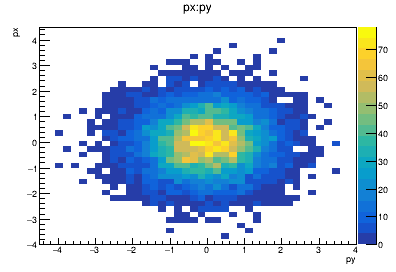

In [9]:
c3 = TCanvas("c3","px:py",400,300);
t.Draw("px:py","","colz")
c3.Draw()

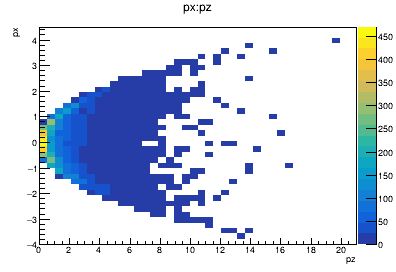

In [10]:
c4 = TCanvas("c4","px:pz",400,300);
t.Draw("px:pz","","colz")
c4.Draw()

# Tcut 使用

In [11]:
t.Show(4)

======> EVENT:4
 px              = -0.0545523
 py              = 1.38322
 pz              = 1.91627
 random          = 0.777661
 i               = 0


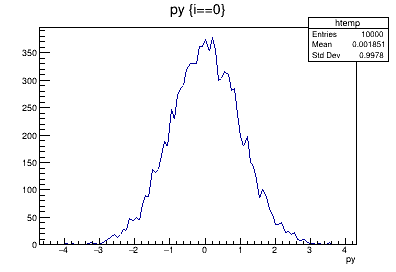

In [12]:
c5 = TCanvas("c5","tcut",400,300)
# i==0就是一个选择条件（注意）
t.Draw("py","i==0","L")
c5.Draw()

In [13]:
f.Close()